<a href="https://colab.research.google.com/github/ravellys/PID-1/blob/master/Permeabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTIMATIVA DA PERMEABILIDADE POR MODELOS DE REDES DE POROS

> Bloco com recuo



O presente projeto tem como objetivo estimar a permeabilidade de rochas reservatório a partir de Modelos de rede de poros (**Pore Network Models, PNM**). Para tanto foi utilizado as bibliotecas de Python PoreSpy e OpenPNM desenvolvidas pelo grupo Porous Materials Engineering & Analysis Lab ( [**PMEAL**](https://pmeal.com) )

# Bibliotecas **PoreSpy** e **OpenPNM**

#  [PoreSpy](http://porespy.org/)
O PoreSpy é uma coleção de ferramentas de análise de imagens usadas para extrair informações de imagens 3D de materiais porosos (normalmente obtidas na tomografia de raios X). 

Recursos oferecidos pelo PoreSpy:

1. **generators**: rotinas para gerar imagens artificiais de materiais porosos úteis para testes e ilustrações
2. **filters**: funções que aceitam uma imagem e retornam uma imagem alterada
3. **Metrics**: Ferramentas para quantificar propriedades de imagens
4. **networks**: Ferramentas para analisar imagens como redes de poros
5. **visualization**: Funções auxiliares para criar visualizações úteis da imagem
6. **io**: Funções para saída de dados de imagem em vários formatos para uso em software comum
7. **tools**: Várias ferramentas úteis para trabalhar com imagens

# [OpenPNM](http://openpnm.org/)


O OpenPNM é um pacote de modelagem de rede de poros de código aberto, escrito em Python. Ele foi projetado para ser totalmente independente da topologia e dimensionalidade da rede, usando representações da teoria dos grafos para descrever a arquitetura. Ele também é projetado para ser **personalizado**.Inclui também um amplo conjunto de algoritmos de **percolação e transporte**, fornecendo um pacote completo para uma ampla variedade de tarefas de **simulação em escala de poros**.

Classes para simulações de transporte em redes de poros:

Generic Classes 
*  GenericAlgorithm
*  GenericTransport
*  ReactiveTransport
*  TransientReactiveTransport

Percolation Classes
*  OrdinaryPercolation
*  Porosimetria
*  InvasionPercolation
*  MixedInvasionPercolation

Classes de transporte
*  FickianDiffusion
*  FourierConduction
*  OhmicConduction
*  StokesFlow
*  AdvectionDiffusion


In [2]:
# Instalação 
%%capture
!pip install porespy
!pip install openpnm

# Importação de Bibliotecas

In [15]:
import os
import imageio
import scipy as sp
import numpy as np
import openpnm as op
import porespy as ps
import matplotlib.pyplot as plt
import skimage as sk
from tqdm import tqdm

np.set_printoptions(precision=4)
np.random.seed(10)
%matplotlib inline

# Seleciona a pasta do Google Drive

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Seleção da amostra segmentada

## Amostra Berea Sandstone - Imperial College

In [ ]:
'''
path = 'drive/My Drive/PDI/Image'
file_format = '.tif'
file_name = 'Berea'
file = file_name + file_format
fetch_file = os.path.join(path, file)
print(fetch_file)
im = imageio.mimread(fetch_file)
im = ~np.array(im, dtype=bool)
im = im[:,:,:]
print(im.shape)
'''

"\npath = 'drive/My Drive/PDI/Image'\nfile_format = '.tif'\nfile_name = 'Berea'\nfile = file_name + file_format\nfetch_file = os.path.join(path, file)\nprint(fetch_file)\nim = imageio.mimread(fetch_file)\nim = ~np.array(im, dtype=bool)\nim = im[:,:,:]\nprint(im.shape)\n"





## Amostra Vn19c1-  UFRN

Nesta etapa será lida uma matriz (nw,nh,ns) a partir das imagens fornecidas em formato .tif e criado um array (im) do tipo booleano. 


In [5]:
'''
path = 'drive/My Drive/Artigo Segmentação/Imagens/out_tambaba/seg_mediana/seg_otsu/' #pasta da amostra
list_files = os.listdir(path) # lista de arquivos dentro da pasta das amostras
list_files = np.sort(np.array(list_files)) # organizar os arquivos

im = [] # inicialização do vetor de armazenamento
for file in list_files: # seleciona 400 slices
  fetch_file = os.path.join(path, file)  
  image = np.array(imageio.mimread(fetch_file)) # importa imagem e converte em numpy
  im.append(image.T) # Adiciona matriz numpy ao vetor de armazenameto

im = np.array(im, dtype = bool) # Converte para bolleano 
im = im[:,:,:,0].T # separa uma região de 400x400x400
print("formato da imagem", im.shape) 
'''

KeyboardInterrupt: ignored

## Amostra em HU

Nesta etapa será lida uma matriz (nw,nh,ns) a partir das imagens em HU  fornecidas em formato .tif e criado um array (im) do tipo booleano com a segmentação por determinação de threshold. 

In [61]:
path = 'drive/My Drive/Artigo Segmentação/Imagens/out_tambaba/seg_mediana/seg_kmean3D/' #pasta da amostra
list_files = os.listdir(path) # lista de arquivos dentro da pasta das amostras
list_files = np.sort(np.array(list_files)) # organizar os arquivos

In [62]:
im_leitura = [] # inicialização do vetor de armazenamento

for file in tqdm(list_files):
  print(".", end = " ")
  fetch_file = os.path.join(path, file)  
  image = np.array(imageio.imread(fetch_file)) # importa imagem e converte em numpy
 
  im_leitura.append(image.T) # Adiciona matriz numpy ao vetor de armazenameto

im_leitura = np.array(im_leitura)
print("formato da imagem HU", im_leitura.shape)
im_leitura = im_leitura[:,:,:].T  
print("formato da imagem HU", im_leitura.shape)

  0%|          | 0/650 [00:00<?, ?it/s]

. 

  0%|          | 1/650 [00:00<06:15,  1.73it/s]

. 

  0%|          | 2/650 [00:01<06:09,  1.75it/s]

. 

  0%|          | 3/650 [00:01<06:04,  1.77it/s]

. 

  1%|          | 4/650 [00:02<05:55,  1.82it/s]

. 

  1%|          | 5/650 [00:02<05:51,  1.84it/s]

. 

  1%|          | 6/650 [00:03<05:47,  1.86it/s]

. 

  1%|          | 7/650 [00:03<05:50,  1.84it/s]

. 

  1%|          | 8/650 [00:04<05:49,  1.84it/s]

. 

  1%|▏         | 9/650 [00:05<07:14,  1.48it/s]

. 

  2%|▏         | 10/650 [00:05<06:45,  1.58it/s]

. 

  2%|▏         | 11/650 [00:06<06:26,  1.65it/s]

. 

  2%|▏         | 12/650 [00:06<06:11,  1.72it/s]

. 

  2%|▏         | 13/650 [00:07<06:05,  1.74it/s]

. 

  2%|▏         | 14/650 [00:08<06:00,  1.77it/s]

. 

  2%|▏         | 15/650 [00:08<05:58,  1.77it/s]

. 

  2%|▏         | 16/650 [00:09<05:58,  1.77it/s]

. 

  3%|▎         | 17/650 [00:09<05:56,  1.77it/s]

. 

  3%|▎         | 18/650 [00:10<05:57,  1.77it/s]

. 

  3%|▎         | 19/650 [00:10<05:58,  1.76it/s]

. 

  3%|▎         | 20/650 [00:11<05:50,  1.80it/s]

. 

  3%|▎         | 21/650 [00:11<05:39,  1.85it/s]

. 

  3%|▎         | 22/650 [00:12<05:41,  1.84it/s]

. 

  4%|▎         | 23/650 [00:13<05:42,  1.83it/s]

. 

  4%|▎         | 24/650 [00:13<05:24,  1.93it/s]

. 

  4%|▍         | 25/650 [00:14<06:18,  1.65it/s]

. 

  4%|▍         | 26/650 [00:14<06:22,  1.63it/s]

. 

  4%|▍         | 27/650 [00:15<06:04,  1.71it/s]

. 

  4%|▍         | 28/650 [00:15<06:01,  1.72it/s]

. 

  4%|▍         | 29/650 [00:16<05:54,  1.75it/s]

. 

  5%|▍         | 30/650 [00:17<05:46,  1.79it/s]

. 

  5%|▍         | 31/650 [00:17<05:39,  1.82it/s]

. 

  5%|▍         | 32/650 [00:18<05:32,  1.86it/s]

. 

  5%|▌         | 33/650 [00:18<05:30,  1.86it/s]

. 

  5%|▌         | 34/650 [00:19<05:27,  1.88it/s]

. 

  5%|▌         | 35/650 [00:19<05:29,  1.86it/s]

. 

  6%|▌         | 36/650 [00:20<05:27,  1.87it/s]

. 

  6%|▌         | 37/650 [00:20<05:27,  1.87it/s]

. 

  6%|▌         | 38/650 [00:21<05:29,  1.85it/s]

. 

  6%|▌         | 39/650 [00:21<05:33,  1.83it/s]

. 

  6%|▌         | 40/650 [00:22<05:34,  1.82it/s]

. 

  6%|▋         | 41/650 [00:23<05:42,  1.78it/s]

. 

  6%|▋         | 42/650 [00:23<05:24,  1.87it/s]

. 

  7%|▋         | 43/650 [00:24<05:21,  1.89it/s]

. 

  7%|▋         | 44/650 [00:24<05:22,  1.88it/s]

. 

  7%|▋         | 45/650 [00:25<05:21,  1.88it/s]

. 

  7%|▋         | 46/650 [00:25<05:24,  1.86it/s]

. 

  7%|▋         | 47/650 [00:26<05:22,  1.87it/s]

. 

  7%|▋         | 48/650 [00:26<06:02,  1.66it/s]

. 

  8%|▊         | 49/650 [00:27<06:03,  1.66it/s]

. 

  8%|▊         | 50/650 [00:28<05:49,  1.72it/s]

. 

  8%|▊         | 51/650 [00:28<05:38,  1.77it/s]

. 

  8%|▊         | 52/650 [00:29<05:48,  1.71it/s]

. 

  8%|▊         | 53/650 [00:29<05:43,  1.74it/s]

. 

  8%|▊         | 54/650 [00:30<05:31,  1.80it/s]

. 

  8%|▊         | 55/650 [00:30<05:25,  1.83it/s]

. 

  9%|▊         | 56/650 [00:31<05:28,  1.81it/s]

. 

  9%|▉         | 57/650 [00:31<05:32,  1.78it/s]

. 

  9%|▉         | 58/650 [00:32<05:22,  1.83it/s]

. 

  9%|▉         | 59/650 [00:33<05:20,  1.85it/s]

. 

  9%|▉         | 60/650 [00:33<05:26,  1.81it/s]

. 

  9%|▉         | 61/650 [00:34<05:23,  1.82it/s]

. 

 10%|▉         | 62/650 [00:34<05:24,  1.81it/s]

. 

 10%|▉         | 63/650 [00:35<05:18,  1.85it/s]

. 

 10%|▉         | 64/650 [00:35<05:17,  1.84it/s]

. 

 10%|█         | 65/650 [00:36<05:13,  1.87it/s]

. 

 10%|█         | 66/650 [00:36<05:11,  1.88it/s]

. 

 10%|█         | 67/650 [00:37<05:17,  1.84it/s]

. 

 10%|█         | 68/650 [00:37<05:13,  1.85it/s]

. 

 11%|█         | 69/650 [00:38<05:10,  1.87it/s]

. 

 11%|█         | 70/650 [00:39<05:47,  1.67it/s]

. 

 11%|█         | 71/650 [00:39<05:36,  1.72it/s]

. 

 11%|█         | 72/650 [00:40<05:28,  1.76it/s]

. 

 11%|█         | 73/650 [00:40<05:27,  1.76it/s]

. 

 11%|█▏        | 74/650 [00:41<05:16,  1.82it/s]

. 

 12%|█▏        | 75/650 [00:42<05:54,  1.62it/s]

. 

 12%|█▏        | 76/650 [00:42<05:47,  1.65it/s]

. 

 12%|█▏        | 77/650 [00:43<05:34,  1.71it/s]

. 

 12%|█▏        | 78/650 [00:43<05:23,  1.77it/s]

. 

 12%|█▏        | 79/650 [00:44<05:17,  1.80it/s]

. 

 12%|█▏        | 80/650 [00:44<05:16,  1.80it/s]

. 

 12%|█▏        | 81/650 [00:45<05:05,  1.86it/s]

. 

 13%|█▎        | 82/650 [00:45<05:06,  1.85it/s]

. 

 13%|█▎        | 83/650 [00:46<05:02,  1.87it/s]

. 

 13%|█▎        | 84/650 [00:46<05:00,  1.89it/s]

. 

 13%|█▎        | 85/650 [00:47<05:02,  1.87it/s]

. 

 13%|█▎        | 86/650 [00:47<05:01,  1.87it/s]

. 

 13%|█▎        | 87/650 [00:48<05:00,  1.88it/s]

. 

 14%|█▎        | 88/650 [00:49<04:58,  1.89it/s]

. 

 14%|█▎        | 89/650 [00:49<04:58,  1.88it/s]

. 

 14%|█▍        | 90/650 [00:50<05:05,  1.83it/s]

. 

 14%|█▍        | 91/650 [00:50<05:00,  1.86it/s]

. 

 14%|█▍        | 92/650 [00:51<05:02,  1.84it/s]

. 

 14%|█▍        | 93/650 [00:51<05:03,  1.83it/s]

. 

 14%|█▍        | 94/650 [00:52<05:01,  1.85it/s]

. 

 15%|█▍        | 95/650 [00:52<04:57,  1.87it/s]

. 

 15%|█▍        | 96/650 [00:53<04:47,  1.93it/s]

. 

 15%|█▍        | 97/650 [00:53<04:47,  1.92it/s]

. 

 15%|█▌        | 98/650 [00:54<04:45,  1.94it/s]

. 

 15%|█▌        | 99/650 [00:54<04:55,  1.87it/s]

. 

 15%|█▌        | 100/650 [00:55<04:51,  1.88it/s]

. 

 16%|█▌        | 101/650 [00:55<04:53,  1.87it/s]

. 

 16%|█▌        | 102/650 [00:56<04:53,  1.87it/s]

. 

 16%|█▌        | 103/650 [00:57<04:52,  1.87it/s]

. 

 16%|█▌        | 104/650 [00:57<05:00,  1.82it/s]

. 

 16%|█▌        | 105/650 [00:58<05:02,  1.80it/s]

. 

 16%|█▋        | 106/650 [00:58<05:01,  1.80it/s]

. 

 16%|█▋        | 107/650 [00:59<04:56,  1.83it/s]

. 

 17%|█▋        | 108/650 [00:59<04:53,  1.85it/s]

. 

 17%|█▋        | 109/650 [01:00<04:50,  1.86it/s]

. 

 17%|█▋        | 110/650 [01:00<04:49,  1.86it/s]

. 

 17%|█▋        | 111/650 [01:01<04:50,  1.85it/s]

. 

 17%|█▋        | 112/650 [01:02<04:58,  1.80it/s]

. 

 17%|█▋        | 113/650 [01:02<04:56,  1.81it/s]

. 

 18%|█▊        | 114/650 [01:03<05:03,  1.76it/s]

. 

 18%|█▊        | 115/650 [01:03<05:13,  1.70it/s]

. 

 18%|█▊        | 116/650 [01:04<05:03,  1.76it/s]

. 

 18%|█▊        | 117/650 [01:04<04:58,  1.78it/s]

. 

 18%|█▊        | 118/650 [01:05<05:02,  1.76it/s]

. 

 18%|█▊        | 119/650 [01:05<04:56,  1.79it/s]

. 

 18%|█▊        | 120/650 [01:06<05:02,  1.75it/s]

. 

 19%|█▊        | 121/650 [01:07<04:56,  1.78it/s]

. 

 19%|█▉        | 122/650 [01:07<04:50,  1.82it/s]

. 

 19%|█▉        | 123/650 [01:08<04:47,  1.83it/s]

. 

 19%|█▉        | 124/650 [01:08<04:44,  1.85it/s]

. 

 19%|█▉        | 125/650 [01:09<04:42,  1.86it/s]

. 

 19%|█▉        | 126/650 [01:09<04:46,  1.83it/s]

. 

 20%|█▉        | 127/650 [01:10<04:41,  1.86it/s]

. 

 20%|█▉        | 128/650 [01:10<04:40,  1.86it/s]

. 

 20%|█▉        | 129/650 [01:11<04:39,  1.87it/s]

. 

 20%|██        | 130/650 [01:11<04:37,  1.87it/s]

. 

 20%|██        | 131/650 [01:12<04:37,  1.87it/s]

. 

 20%|██        | 132/650 [01:13<04:41,  1.84it/s]

. 

 20%|██        | 133/650 [01:13<04:38,  1.86it/s]

. 

 21%|██        | 134/650 [01:14<04:36,  1.87it/s]

. 

 21%|██        | 135/650 [01:14<04:33,  1.88it/s]

. 

 21%|██        | 136/650 [01:15<04:46,  1.79it/s]

. 

 21%|██        | 137/650 [01:15<04:42,  1.82it/s]

. 

 21%|██        | 138/650 [01:16<04:38,  1.84it/s]

. 

 21%|██▏       | 139/650 [01:16<04:34,  1.86it/s]

. 

 22%|██▏       | 140/650 [01:17<05:09,  1.65it/s]

. 

 22%|██▏       | 141/650 [01:18<04:58,  1.71it/s]

. 

 22%|██▏       | 142/650 [01:18<04:51,  1.74it/s]

. 

 22%|██▏       | 143/650 [01:19<04:50,  1.75it/s]

. 

 22%|██▏       | 144/650 [01:19<04:47,  1.76it/s]

. 

 22%|██▏       | 145/650 [01:20<04:46,  1.76it/s]

. 

 22%|██▏       | 146/650 [01:20<04:38,  1.81it/s]

. 

 23%|██▎       | 147/650 [01:21<04:37,  1.81it/s]

. 

 23%|██▎       | 148/650 [01:21<04:33,  1.83it/s]

. 

 23%|██▎       | 149/650 [01:22<04:40,  1.79it/s]

. 

 23%|██▎       | 150/650 [01:23<04:45,  1.75it/s]

. 

 23%|██▎       | 151/650 [01:23<04:40,  1.78it/s]

. 

 23%|██▎       | 152/650 [01:24<04:35,  1.81it/s]

. 

 24%|██▎       | 153/650 [01:24<04:31,  1.83it/s]

. 

 24%|██▎       | 154/650 [01:25<04:43,  1.75it/s]

. 

 24%|██▍       | 155/650 [01:25<04:33,  1.81it/s]

. 

 24%|██▍       | 156/650 [01:26<04:30,  1.82it/s]

. 

 24%|██▍       | 157/650 [01:27<04:45,  1.72it/s]

. 

 24%|██▍       | 158/650 [01:27<04:39,  1.76it/s]

. 

 24%|██▍       | 159/650 [01:28<04:37,  1.77it/s]

. 

 25%|██▍       | 160/650 [01:28<04:33,  1.79it/s]

. 

 25%|██▍       | 161/650 [01:29<04:31,  1.80it/s]

. 

 25%|██▍       | 162/650 [01:30<05:15,  1.55it/s]

. 

 25%|██▌       | 163/650 [01:30<05:01,  1.62it/s]

. 

 25%|██▌       | 164/650 [01:31<04:50,  1.67it/s]

. 

 25%|██▌       | 165/650 [01:31<04:41,  1.72it/s]

. 

 26%|██▌       | 166/650 [01:32<04:33,  1.77it/s]

. 

 26%|██▌       | 167/650 [01:32<04:31,  1.78it/s]

. 

 26%|██▌       | 168/650 [01:33<04:28,  1.79it/s]

. 

 26%|██▌       | 169/650 [01:33<04:20,  1.84it/s]

. 

 26%|██▌       | 170/650 [01:34<04:19,  1.85it/s]

. 

 26%|██▋       | 171/650 [01:35<04:26,  1.80it/s]

. 

 26%|██▋       | 172/650 [01:35<04:34,  1.74it/s]

. 

 27%|██▋       | 173/650 [01:36<04:26,  1.79it/s]

. 

 27%|██▋       | 174/650 [01:36<04:31,  1.75it/s]

. 

 27%|██▋       | 175/650 [01:37<04:27,  1.78it/s]

. 

 27%|██▋       | 176/650 [01:37<04:24,  1.79it/s]

. 

 27%|██▋       | 177/650 [01:38<04:17,  1.83it/s]

. 

 27%|██▋       | 178/650 [01:38<04:13,  1.86it/s]

. 

 28%|██▊       | 179/650 [01:39<04:13,  1.86it/s]

. 

 28%|██▊       | 180/650 [01:39<04:10,  1.88it/s]

. 

 28%|██▊       | 181/650 [01:40<04:11,  1.86it/s]

. 

 28%|██▊       | 182/650 [01:41<04:11,  1.86it/s]

. 

 28%|██▊       | 183/650 [01:41<04:11,  1.85it/s]

. 

 28%|██▊       | 184/650 [01:42<04:12,  1.85it/s]

. 

 28%|██▊       | 185/650 [01:42<04:10,  1.86it/s]

. 

 29%|██▊       | 186/650 [01:43<04:13,  1.83it/s]

. 

 29%|██▉       | 187/650 [01:43<04:08,  1.86it/s]

. 

 29%|██▉       | 188/650 [01:44<04:35,  1.68it/s]

. 

 29%|██▉       | 189/650 [01:45<04:25,  1.73it/s]

. 

 29%|██▉       | 190/650 [01:45<04:17,  1.79it/s]

. 

 29%|██▉       | 191/650 [01:46<04:13,  1.81it/s]

. 

 30%|██▉       | 192/650 [01:46<04:10,  1.83it/s]

. 

 30%|██▉       | 193/650 [01:47<04:05,  1.86it/s]

. 

 30%|██▉       | 194/650 [01:47<04:08,  1.84it/s]

. 

 30%|███       | 195/650 [01:48<04:06,  1.85it/s]

. 

 30%|███       | 196/650 [01:48<04:01,  1.88it/s]

. 

 30%|███       | 197/650 [01:49<04:01,  1.88it/s]

. 

 30%|███       | 198/650 [01:49<03:58,  1.89it/s]

. 

 31%|███       | 199/650 [01:50<04:04,  1.84it/s]

. 

 31%|███       | 200/650 [01:50<04:05,  1.84it/s]

. 

 31%|███       | 201/650 [01:51<04:01,  1.86it/s]

. 

 31%|███       | 202/650 [01:51<04:00,  1.86it/s]

. 

 31%|███       | 203/650 [01:52<04:00,  1.86it/s]

. 

 31%|███▏      | 204/650 [01:53<03:57,  1.88it/s]

. 

 32%|███▏      | 205/650 [01:53<03:57,  1.87it/s]

. 

 32%|███▏      | 206/650 [01:54<03:54,  1.89it/s]

. 

 32%|███▏      | 207/650 [01:54<03:54,  1.89it/s]

. 

 32%|███▏      | 208/650 [01:55<03:50,  1.92it/s]

. 

 32%|███▏      | 209/650 [01:55<03:51,  1.90it/s]

. 

 32%|███▏      | 210/650 [01:56<04:30,  1.63it/s]

. 

 32%|███▏      | 211/650 [01:56<04:18,  1.70it/s]

. 

 33%|███▎      | 212/650 [01:57<04:18,  1.69it/s]

. 

 33%|███▎      | 213/650 [01:58<04:13,  1.72it/s]

. 

 33%|███▎      | 214/650 [01:58<04:06,  1.77it/s]

. 

 33%|███▎      | 215/650 [01:59<04:00,  1.81it/s]

. 

 33%|███▎      | 216/650 [01:59<03:59,  1.81it/s]

. 

 33%|███▎      | 217/650 [02:00<03:54,  1.85it/s]

. 

 34%|███▎      | 218/650 [02:00<04:03,  1.78it/s]

. 

 34%|███▎      | 219/650 [02:01<03:58,  1.80it/s]

. 

 34%|███▍      | 220/650 [02:02<04:16,  1.68it/s]

. 

 34%|███▍      | 221/650 [02:02<04:09,  1.72it/s]

. 

 34%|███▍      | 222/650 [02:03<04:06,  1.74it/s]

. 

 34%|███▍      | 223/650 [02:03<04:00,  1.77it/s]

. 

 34%|███▍      | 224/650 [02:04<03:55,  1.81it/s]

. 

 35%|███▍      | 225/650 [02:04<03:52,  1.83it/s]

. 

 35%|███▍      | 226/650 [02:05<03:49,  1.85it/s]

. 

 35%|███▍      | 227/650 [02:05<03:45,  1.88it/s]

. 

 35%|███▌      | 228/650 [02:06<03:46,  1.86it/s]

. 

 35%|███▌      | 229/650 [02:06<03:53,  1.81it/s]

. 

 35%|███▌      | 230/650 [02:07<03:54,  1.79it/s]

. 

 36%|███▌      | 231/650 [02:08<03:49,  1.83it/s]

. 

 36%|███▌      | 232/650 [02:08<03:45,  1.86it/s]

. 

 36%|███▌      | 233/650 [02:09<03:42,  1.87it/s]

. 

 36%|███▌      | 234/650 [02:09<03:41,  1.88it/s]

. 

 36%|███▌      | 235/650 [02:10<03:42,  1.86it/s]

. 

 36%|███▋      | 236/650 [02:10<03:40,  1.88it/s]

. 

 36%|███▋      | 237/650 [02:11<03:38,  1.89it/s]

. 

 37%|███▋      | 238/650 [02:11<03:47,  1.81it/s]

. 

 37%|███▋      | 239/650 [02:12<03:45,  1.82it/s]

. 

 37%|███▋      | 240/650 [02:12<03:46,  1.81it/s]

. 

 37%|███▋      | 241/650 [02:13<03:44,  1.82it/s]

. 

 37%|███▋      | 242/650 [02:14<03:42,  1.83it/s]

. 

 37%|███▋      | 243/650 [02:14<03:42,  1.83it/s]

. 

 38%|███▊      | 244/650 [02:15<03:46,  1.79it/s]

. 

 38%|███▊      | 245/650 [02:15<03:44,  1.81it/s]

. 

 38%|███▊      | 246/650 [02:16<03:41,  1.83it/s]

. 

 38%|███▊      | 247/650 [02:16<03:38,  1.84it/s]

. 

 38%|███▊      | 248/650 [02:17<03:35,  1.86it/s]

. 

 38%|███▊      | 249/650 [02:17<03:33,  1.88it/s]

. 

 38%|███▊      | 250/650 [02:18<03:35,  1.86it/s]

. 

 39%|███▊      | 251/650 [02:18<03:33,  1.87it/s]

. 

 39%|███▉      | 252/650 [02:19<03:32,  1.87it/s]

. 

 39%|███▉      | 253/650 [02:19<03:29,  1.89it/s]

. 

 39%|███▉      | 254/650 [02:20<03:50,  1.72it/s]

. 

 39%|███▉      | 255/650 [02:21<03:44,  1.76it/s]

. 

 39%|███▉      | 256/650 [02:21<03:36,  1.82it/s]

. 

 40%|███▉      | 257/650 [02:22<03:30,  1.87it/s]

. 

 40%|███▉      | 258/650 [02:22<03:28,  1.88it/s]

. 

 40%|███▉      | 259/650 [02:23<03:27,  1.88it/s]

. 

 40%|████      | 260/650 [02:23<03:34,  1.82it/s]

. 

 40%|████      | 261/650 [02:24<03:34,  1.81it/s]

. 

 40%|████      | 262/650 [02:24<03:33,  1.82it/s]

. 

 40%|████      | 263/650 [02:25<03:31,  1.83it/s]

. 

 41%|████      | 264/650 [02:26<03:33,  1.81it/s]

. 

 41%|████      | 265/650 [02:26<03:42,  1.73it/s]

. 

 41%|████      | 266/650 [02:27<03:31,  1.81it/s]

. 

 41%|████      | 267/650 [02:27<03:28,  1.83it/s]

. 

 41%|████      | 268/650 [02:28<03:27,  1.84it/s]

. 

 41%|████▏     | 269/650 [02:28<03:30,  1.81it/s]

. 

 42%|████▏     | 270/650 [02:29<03:26,  1.84it/s]

. 

 42%|████▏     | 271/650 [02:29<03:25,  1.84it/s]

. 

 42%|████▏     | 272/650 [02:30<03:26,  1.83it/s]

. 

 42%|████▏     | 273/650 [02:30<03:26,  1.82it/s]

. 

 42%|████▏     | 274/650 [02:31<03:23,  1.84it/s]

. 

 42%|████▏     | 275/650 [02:32<03:21,  1.86it/s]

. 

 42%|████▏     | 276/650 [02:32<03:25,  1.82it/s]

. 

 43%|████▎     | 277/650 [02:33<03:23,  1.83it/s]

. 

 43%|████▎     | 278/650 [02:33<03:18,  1.87it/s]

. 

 43%|████▎     | 279/650 [02:34<03:21,  1.84it/s]

. 

 43%|████▎     | 280/650 [02:34<03:19,  1.85it/s]

. 

 43%|████▎     | 281/650 [02:35<03:18,  1.86it/s]

. 

 43%|████▎     | 282/650 [02:35<03:19,  1.84it/s]

. 

 44%|████▎     | 283/650 [02:36<03:19,  1.84it/s]

. 

 44%|████▎     | 284/650 [02:36<03:21,  1.82it/s]

. 

 44%|████▍     | 285/650 [02:37<03:19,  1.83it/s]

. 

 44%|████▍     | 286/650 [02:38<03:15,  1.86it/s]

. 

 44%|████▍     | 287/650 [02:38<03:13,  1.87it/s]

. 

 44%|████▍     | 288/650 [02:39<03:15,  1.85it/s]

. 

 44%|████▍     | 289/650 [02:39<03:10,  1.90it/s]

. 

 45%|████▍     | 290/650 [02:40<03:06,  1.93it/s]

. 

 45%|████▍     | 291/650 [02:40<03:07,  1.92it/s]

. 

 45%|████▍     | 292/650 [02:41<03:08,  1.90it/s]

. 

 45%|████▌     | 293/650 [02:41<03:08,  1.89it/s]

. 

 45%|████▌     | 294/650 [02:42<03:09,  1.88it/s]

. 

 45%|████▌     | 295/650 [02:42<03:07,  1.90it/s]

. 

 46%|████▌     | 296/650 [02:43<03:08,  1.87it/s]

. 

 46%|████▌     | 297/650 [02:43<03:07,  1.89it/s]

. 

 46%|████▌     | 298/650 [02:44<03:10,  1.85it/s]

. 

 46%|████▌     | 299/650 [02:44<03:06,  1.88it/s]

. 

 46%|████▌     | 300/650 [02:45<03:04,  1.90it/s]

. 

 46%|████▋     | 301/650 [02:45<03:03,  1.90it/s]

. 

 46%|████▋     | 302/650 [02:46<03:09,  1.83it/s]

. 

 47%|████▋     | 303/650 [02:47<03:14,  1.78it/s]

. 

 47%|████▋     | 304/650 [02:47<03:10,  1.82it/s]

. 

 47%|████▋     | 305/650 [02:48<03:07,  1.84it/s]

. 

 47%|████▋     | 306/650 [02:48<03:05,  1.86it/s]

. 

 47%|████▋     | 307/650 [02:49<03:02,  1.88it/s]

. 

 47%|████▋     | 308/650 [02:49<03:01,  1.88it/s]

. 

 48%|████▊     | 309/650 [02:50<03:00,  1.89it/s]

. 

 48%|████▊     | 310/650 [02:50<03:00,  1.89it/s]

. 

 48%|████▊     | 311/650 [02:51<03:01,  1.87it/s]

. 

 48%|████▊     | 312/650 [02:51<02:59,  1.88it/s]

. 

 48%|████▊     | 313/650 [02:52<02:58,  1.89it/s]

. 

 48%|████▊     | 314/650 [02:52<03:02,  1.84it/s]

. 

 48%|████▊     | 315/650 [02:53<03:05,  1.80it/s]

. 

 49%|████▊     | 316/650 [02:54<03:02,  1.83it/s]

. 

 49%|████▉     | 317/650 [02:54<02:59,  1.85it/s]

. 

 49%|████▉     | 318/650 [02:55<02:58,  1.86it/s]

. 

 49%|████▉     | 319/650 [02:55<03:08,  1.75it/s]

. 

 49%|████▉     | 320/650 [02:56<03:00,  1.82it/s]

. 

 49%|████▉     | 321/650 [02:56<03:00,  1.83it/s]

. 

 50%|████▉     | 322/650 [02:57<02:58,  1.83it/s]

. 

 50%|████▉     | 323/650 [02:57<02:56,  1.85it/s]

. 

 50%|████▉     | 324/650 [02:58<02:54,  1.87it/s]

. 

 50%|█████     | 325/650 [02:58<02:54,  1.87it/s]

. 

 50%|█████     | 326/650 [02:59<02:55,  1.85it/s]

. 

 50%|█████     | 327/650 [03:00<02:53,  1.86it/s]

. 

 50%|█████     | 328/650 [03:00<02:54,  1.85it/s]

. 

 51%|█████     | 329/650 [03:01<03:00,  1.77it/s]

. 

 51%|█████     | 330/650 [03:01<02:56,  1.81it/s]

. 

 51%|█████     | 331/650 [03:02<02:53,  1.84it/s]

. 

 51%|█████     | 332/650 [03:02<02:50,  1.86it/s]

. 

 51%|█████     | 333/650 [03:03<02:55,  1.80it/s]

. 

 51%|█████▏    | 334/650 [03:03<02:46,  1.90it/s]

. 

 52%|█████▏    | 335/650 [03:04<02:45,  1.91it/s]

. 

 52%|█████▏    | 336/650 [03:04<02:45,  1.90it/s]

. 

 52%|█████▏    | 337/650 [03:05<02:49,  1.85it/s]

. 

 52%|█████▏    | 338/650 [03:05<02:48,  1.85it/s]

. 

 52%|█████▏    | 339/650 [03:06<02:46,  1.86it/s]

. 

 52%|█████▏    | 340/650 [03:07<02:45,  1.88it/s]

. 

 52%|█████▏    | 341/650 [03:07<02:46,  1.86it/s]

. 

 53%|█████▎    | 342/650 [03:08<02:43,  1.88it/s]

. 

 53%|█████▎    | 343/650 [03:08<02:43,  1.87it/s]

. 

 53%|█████▎    | 344/650 [03:09<02:43,  1.87it/s]

. 

 53%|█████▎    | 345/650 [03:09<02:44,  1.85it/s]

. 

 53%|█████▎    | 346/650 [03:10<02:44,  1.84it/s]

. 

 53%|█████▎    | 347/650 [03:10<02:43,  1.85it/s]

. 

 54%|█████▎    | 348/650 [03:11<02:43,  1.84it/s]

. 

 54%|█████▎    | 349/650 [03:11<02:43,  1.84it/s]

. 

 54%|█████▍    | 350/650 [03:12<02:42,  1.84it/s]

. 

 54%|█████▍    | 351/650 [03:12<02:42,  1.85it/s]

. 

 54%|█████▍    | 352/650 [03:13<02:39,  1.87it/s]

. 

 54%|█████▍    | 353/650 [03:14<02:38,  1.88it/s]

. 

 54%|█████▍    | 354/650 [03:14<02:39,  1.86it/s]

. 

 55%|█████▍    | 355/650 [03:15<02:37,  1.88it/s]

. 

 55%|█████▍    | 356/650 [03:15<02:34,  1.91it/s]

. 

 55%|█████▍    | 357/650 [03:16<02:32,  1.92it/s]

. 

 55%|█████▌    | 358/650 [03:16<02:32,  1.91it/s]

. 

 55%|█████▌    | 359/650 [03:17<02:32,  1.91it/s]

. 

 55%|█████▌    | 360/650 [03:17<02:34,  1.88it/s]

. 

 56%|█████▌    | 361/650 [03:18<02:35,  1.86it/s]

. 

 56%|█████▌    | 362/650 [03:18<02:35,  1.85it/s]

. 

 56%|█████▌    | 363/650 [03:19<02:35,  1.84it/s]

. 

 56%|█████▌    | 364/650 [03:19<02:33,  1.86it/s]

. 

 56%|█████▌    | 365/650 [03:20<02:38,  1.80it/s]

. 

 56%|█████▋    | 366/650 [03:21<02:35,  1.83it/s]

. 

 56%|█████▋    | 367/650 [03:21<02:31,  1.86it/s]

. 

 57%|█████▋    | 368/650 [03:22<02:34,  1.83it/s]

. 

 57%|█████▋    | 369/650 [03:22<02:33,  1.83it/s]

. 

 57%|█████▋    | 370/650 [03:23<02:33,  1.83it/s]

. 

 57%|█████▋    | 371/650 [03:23<02:32,  1.83it/s]

. 

 57%|█████▋    | 372/650 [03:24<02:29,  1.86it/s]

. 

 57%|█████▋    | 373/650 [03:24<02:28,  1.87it/s]

. 

 58%|█████▊    | 374/650 [03:25<02:28,  1.86it/s]

. 

 58%|█████▊    | 375/650 [03:25<02:27,  1.87it/s]

. 

 58%|█████▊    | 376/650 [03:26<02:26,  1.88it/s]

. 

 58%|█████▊    | 377/650 [03:26<02:26,  1.86it/s]

. 

 58%|█████▊    | 378/650 [03:27<02:25,  1.87it/s]

. 

 58%|█████▊    | 379/650 [03:28<02:26,  1.85it/s]

. 

 58%|█████▊    | 380/650 [03:28<02:23,  1.88it/s]

. 

 59%|█████▊    | 381/650 [03:29<02:23,  1.88it/s]

. 

 59%|█████▉    | 382/650 [03:29<02:22,  1.88it/s]

. 

 59%|█████▉    | 383/650 [03:30<02:22,  1.87it/s]

. 

 59%|█████▉    | 384/650 [03:30<02:23,  1.86it/s]

. 

 59%|█████▉    | 385/650 [03:31<02:22,  1.86it/s]

. 

 59%|█████▉    | 386/650 [03:31<02:22,  1.85it/s]

. 

 60%|█████▉    | 387/650 [03:32<02:21,  1.86it/s]

. 

 60%|█████▉    | 388/650 [03:32<02:19,  1.88it/s]

. 

 60%|█████▉    | 389/650 [03:33<02:20,  1.85it/s]

. 

 60%|██████    | 390/650 [03:33<02:21,  1.84it/s]

. 

 60%|██████    | 391/650 [03:34<02:20,  1.84it/s]

. 

 60%|██████    | 392/650 [03:34<02:19,  1.85it/s]

. 

 60%|██████    | 393/650 [03:35<02:15,  1.90it/s]

. 

 61%|██████    | 394/650 [03:36<02:15,  1.89it/s]

. 

 61%|██████    | 395/650 [03:36<02:15,  1.88it/s]

. 

 61%|██████    | 396/650 [03:37<02:14,  1.88it/s]

. 

 61%|██████    | 397/650 [03:37<02:14,  1.88it/s]

. 

 61%|██████    | 398/650 [03:38<02:17,  1.84it/s]

. 

 61%|██████▏   | 399/650 [03:38<02:16,  1.85it/s]

. 

 62%|██████▏   | 400/650 [03:39<02:13,  1.87it/s]

. 

 62%|██████▏   | 401/650 [03:39<02:13,  1.86it/s]

. 

 62%|██████▏   | 402/650 [03:40<02:10,  1.90it/s]

. 

 62%|██████▏   | 403/650 [03:40<02:10,  1.89it/s]

. 

 62%|██████▏   | 404/650 [03:41<02:14,  1.83it/s]

. 

 62%|██████▏   | 405/650 [03:41<02:13,  1.84it/s]

. 

 62%|██████▏   | 406/650 [03:42<02:11,  1.86it/s]

. 

 63%|██████▎   | 407/650 [03:42<02:09,  1.87it/s]

. 

 63%|██████▎   | 408/650 [03:43<02:08,  1.88it/s]

. 

 63%|██████▎   | 409/650 [03:44<02:07,  1.89it/s]

. 

 63%|██████▎   | 410/650 [03:44<02:09,  1.86it/s]

. 

 63%|██████▎   | 411/650 [03:45<02:10,  1.84it/s]

. 

 63%|██████▎   | 412/650 [03:45<02:07,  1.87it/s]

. 

 64%|██████▎   | 413/650 [03:46<02:07,  1.86it/s]

. 

 64%|██████▎   | 414/650 [03:46<02:11,  1.79it/s]

. 

 64%|██████▍   | 415/650 [03:47<02:07,  1.85it/s]

. 

 64%|██████▍   | 416/650 [03:47<02:06,  1.85it/s]

. 

 64%|██████▍   | 417/650 [03:48<02:10,  1.78it/s]

. 

 64%|██████▍   | 418/650 [03:49<02:10,  1.78it/s]

. 

 64%|██████▍   | 419/650 [03:49<02:08,  1.80it/s]

. 

 65%|██████▍   | 420/650 [03:50<02:08,  1.79it/s]

. 

 65%|██████▍   | 421/650 [03:50<02:07,  1.80it/s]

. 

 65%|██████▍   | 422/650 [03:51<02:04,  1.82it/s]

. 

 65%|██████▌   | 423/650 [03:51<02:04,  1.82it/s]

. 

 65%|██████▌   | 424/650 [03:52<02:02,  1.85it/s]

. 

 65%|██████▌   | 425/650 [03:52<02:01,  1.86it/s]

. 

 66%|██████▌   | 426/650 [03:53<01:59,  1.88it/s]

. 

 66%|██████▌   | 427/650 [03:53<01:59,  1.86it/s]

. 

 66%|██████▌   | 428/650 [03:54<01:58,  1.87it/s]

. 

 66%|██████▌   | 429/650 [03:54<01:58,  1.87it/s]

. 

 66%|██████▌   | 430/650 [03:55<01:56,  1.88it/s]

. 

 66%|██████▋   | 431/650 [03:56<01:56,  1.88it/s]

. 

 66%|██████▋   | 432/650 [03:56<02:07,  1.71it/s]

. 

 67%|██████▋   | 433/650 [03:57<02:14,  1.61it/s]

. 

 67%|██████▋   | 434/650 [03:58<02:11,  1.64it/s]

. 

 67%|██████▋   | 435/650 [03:58<02:07,  1.68it/s]

. 

 67%|██████▋   | 436/650 [03:59<02:03,  1.73it/s]

. 

 67%|██████▋   | 437/650 [03:59<02:00,  1.77it/s]

. 

 67%|██████▋   | 438/650 [04:00<01:57,  1.80it/s]

. 

 68%|██████▊   | 439/650 [04:00<01:57,  1.80it/s]

. 

 68%|██████▊   | 440/650 [04:01<01:59,  1.75it/s]

. 

 68%|██████▊   | 441/650 [04:01<01:56,  1.80it/s]

. 

 68%|██████▊   | 442/650 [04:02<01:53,  1.83it/s]

. 

 68%|██████▊   | 443/650 [04:02<01:52,  1.84it/s]

. 

 68%|██████▊   | 444/650 [04:03<01:52,  1.83it/s]

. 

 68%|██████▊   | 445/650 [04:04<01:51,  1.84it/s]

. 

 69%|██████▊   | 446/650 [04:04<01:50,  1.85it/s]

. 

 69%|██████▉   | 447/650 [04:05<01:49,  1.85it/s]

. 

 69%|██████▉   | 448/650 [04:05<01:48,  1.86it/s]

. 

 69%|██████▉   | 449/650 [04:06<01:47,  1.86it/s]

. 

 69%|██████▉   | 450/650 [04:06<01:46,  1.87it/s]

. 

 69%|██████▉   | 451/650 [04:07<01:45,  1.89it/s]

. 

 70%|██████▉   | 452/650 [04:07<01:45,  1.88it/s]

. 

 70%|██████▉   | 453/650 [04:08<01:45,  1.87it/s]

. 

 70%|██████▉   | 454/650 [04:08<01:47,  1.83it/s]

. 

 70%|███████   | 455/650 [04:09<01:45,  1.84it/s]

. 

 70%|███████   | 456/650 [04:09<01:45,  1.83it/s]

. 

 70%|███████   | 457/650 [04:10<01:44,  1.85it/s]

. 

 70%|███████   | 458/650 [04:11<01:42,  1.87it/s]

. 

 71%|███████   | 459/650 [04:11<01:42,  1.86it/s]

. 

 71%|███████   | 460/650 [04:12<01:44,  1.81it/s]

. 

 71%|███████   | 461/650 [04:12<01:42,  1.85it/s]

. 

 71%|███████   | 462/650 [04:13<01:41,  1.86it/s]

. 

 71%|███████   | 463/650 [04:13<01:39,  1.88it/s]

. 

 71%|███████▏  | 464/650 [04:14<01:38,  1.88it/s]

. 

 72%|███████▏  | 465/650 [04:14<01:38,  1.87it/s]

. 

 72%|███████▏  | 466/650 [04:15<01:37,  1.89it/s]

. 

 72%|███████▏  | 467/650 [04:15<01:36,  1.89it/s]

. 

 72%|███████▏  | 468/650 [04:16<01:38,  1.85it/s]

. 

 72%|███████▏  | 469/650 [04:16<01:37,  1.86it/s]

. 

 72%|███████▏  | 470/650 [04:17<01:37,  1.86it/s]

. 

 72%|███████▏  | 471/650 [04:17<01:36,  1.86it/s]

. 

 73%|███████▎  | 472/650 [04:18<01:33,  1.90it/s]

. 

 73%|███████▎  | 473/650 [04:19<01:33,  1.90it/s]

. 

 73%|███████▎  | 474/650 [04:19<01:34,  1.86it/s]

. 

 73%|███████▎  | 475/650 [04:20<01:34,  1.86it/s]

. 

 73%|███████▎  | 476/650 [04:20<01:33,  1.86it/s]

. 

 73%|███████▎  | 477/650 [04:21<01:31,  1.88it/s]

. 

 74%|███████▎  | 478/650 [04:21<01:30,  1.89it/s]

. 

 74%|███████▎  | 479/650 [04:22<01:30,  1.89it/s]

. 

 74%|███████▍  | 480/650 [04:22<01:29,  1.90it/s]

. 

 74%|███████▍  | 481/650 [04:23<01:28,  1.91it/s]

. 

 74%|███████▍  | 482/650 [04:23<01:27,  1.91it/s]

. 

 74%|███████▍  | 483/650 [04:24<01:27,  1.90it/s]

. 

 74%|███████▍  | 484/650 [04:24<01:27,  1.91it/s]

. 

 75%|███████▍  | 485/650 [04:25<01:25,  1.92it/s]

. 

 75%|███████▍  | 486/650 [04:25<01:26,  1.89it/s]

. 

 75%|███████▍  | 487/650 [04:26<01:25,  1.91it/s]

. 

 75%|███████▌  | 488/650 [04:26<01:24,  1.91it/s]

. 

 75%|███████▌  | 489/650 [04:27<01:25,  1.89it/s]

. 

 75%|███████▌  | 490/650 [04:28<01:25,  1.88it/s]

. 

 76%|███████▌  | 491/650 [04:28<01:24,  1.89it/s]

. 

 76%|███████▌  | 492/650 [04:29<01:23,  1.89it/s]

. 

 76%|███████▌  | 493/650 [04:29<01:23,  1.88it/s]

. 

 76%|███████▌  | 494/650 [04:30<01:23,  1.88it/s]

. 

 76%|███████▌  | 495/650 [04:30<01:21,  1.90it/s]

. 

 76%|███████▋  | 496/650 [04:31<01:21,  1.89it/s]

. 

 76%|███████▋  | 497/650 [04:31<01:20,  1.91it/s]

. 

 77%|███████▋  | 498/650 [04:32<01:20,  1.88it/s]

. 

 77%|███████▋  | 499/650 [04:32<01:20,  1.89it/s]

. 

 77%|███████▋  | 500/650 [04:33<01:20,  1.86it/s]

. 

 77%|███████▋  | 501/650 [04:33<01:21,  1.83it/s]

. 

 77%|███████▋  | 502/650 [04:34<01:20,  1.84it/s]

. 

 77%|███████▋  | 503/650 [04:34<01:18,  1.86it/s]

. 

 78%|███████▊  | 504/650 [04:35<01:17,  1.89it/s]

. 

 78%|███████▊  | 505/650 [04:35<01:16,  1.89it/s]

. 

 78%|███████▊  | 506/650 [04:36<01:15,  1.92it/s]

. 

 78%|███████▊  | 507/650 [04:37<01:15,  1.89it/s]

. 

 78%|███████▊  | 508/650 [04:37<01:15,  1.88it/s]

. 

 78%|███████▊  | 509/650 [04:38<01:13,  1.91it/s]

. 

 78%|███████▊  | 510/650 [04:38<01:12,  1.94it/s]

. 

 79%|███████▊  | 511/650 [04:39<01:12,  1.93it/s]

. 

 79%|███████▉  | 512/650 [04:39<01:12,  1.90it/s]

. 

 79%|███████▉  | 513/650 [04:40<01:11,  1.92it/s]

. 

 79%|███████▉  | 514/650 [04:40<01:11,  1.90it/s]

. 

 79%|███████▉  | 515/650 [04:41<01:10,  1.91it/s]

. 

 79%|███████▉  | 516/650 [04:41<01:09,  1.94it/s]

. 

 80%|███████▉  | 517/650 [04:42<01:14,  1.79it/s]

. 

 80%|███████▉  | 518/650 [04:42<01:13,  1.80it/s]

. 

 80%|███████▉  | 519/650 [04:43<01:11,  1.82it/s]

. 

 80%|████████  | 520/650 [04:43<01:10,  1.85it/s]

. 

 80%|████████  | 521/650 [04:44<01:08,  1.88it/s]

. 

 80%|████████  | 522/650 [04:45<01:08,  1.87it/s]

. 

 80%|████████  | 523/650 [04:45<01:08,  1.84it/s]

. 

 81%|████████  | 524/650 [04:46<01:08,  1.83it/s]

. 

 81%|████████  | 525/650 [04:46<01:08,  1.82it/s]

. 

 81%|████████  | 526/650 [04:47<01:07,  1.85it/s]

. 

 81%|████████  | 527/650 [04:47<01:06,  1.86it/s]

. 

 81%|████████  | 528/650 [04:48<01:08,  1.79it/s]

. 

 81%|████████▏ | 529/650 [04:48<01:04,  1.88it/s]

. 

 82%|████████▏ | 530/650 [04:49<01:03,  1.88it/s]

. 

 82%|████████▏ | 531/650 [04:49<01:03,  1.87it/s]

. 

 82%|████████▏ | 532/650 [04:50<01:02,  1.89it/s]

. 

 82%|████████▏ | 533/650 [04:50<01:02,  1.88it/s]

. 

 82%|████████▏ | 534/650 [04:51<01:01,  1.88it/s]

. 

 82%|████████▏ | 535/650 [04:52<01:02,  1.85it/s]

. 

 82%|████████▏ | 536/650 [04:52<01:01,  1.87it/s]

. 

 83%|████████▎ | 537/650 [04:53<01:00,  1.88it/s]

. 

 83%|████████▎ | 538/650 [04:53<00:58,  1.91it/s]

. 

 83%|████████▎ | 539/650 [04:54<00:58,  1.91it/s]

. 

 83%|████████▎ | 540/650 [04:54<01:02,  1.77it/s]

. 

 83%|████████▎ | 541/650 [04:55<01:00,  1.81it/s]

. 

 83%|████████▎ | 542/650 [04:55<00:59,  1.83it/s]

. 

 84%|████████▎ | 543/650 [04:56<00:59,  1.81it/s]

. 

 84%|████████▎ | 544/650 [04:56<00:58,  1.81it/s]

. 

 84%|████████▍ | 545/650 [04:57<00:56,  1.86it/s]

. 

 84%|████████▍ | 546/650 [04:57<00:55,  1.87it/s]

. 

 84%|████████▍ | 547/650 [04:58<00:54,  1.87it/s]

. 

 84%|████████▍ | 548/650 [04:59<00:53,  1.90it/s]

. 

 84%|████████▍ | 549/650 [04:59<00:53,  1.90it/s]

. 

 85%|████████▍ | 550/650 [05:00<00:53,  1.86it/s]

. 

 85%|████████▍ | 551/650 [05:00<00:52,  1.88it/s]

. 

 85%|████████▍ | 552/650 [05:01<00:53,  1.84it/s]

. 

 85%|████████▌ | 553/650 [05:01<00:53,  1.82it/s]

. 

 85%|████████▌ | 554/650 [05:02<00:53,  1.81it/s]

. 

 85%|████████▌ | 555/650 [05:02<00:51,  1.86it/s]

. 

 86%|████████▌ | 556/650 [05:03<00:50,  1.87it/s]

. 

 86%|████████▌ | 557/650 [05:03<00:50,  1.84it/s]

. 

 86%|████████▌ | 558/650 [05:04<00:49,  1.86it/s]

. 

 86%|████████▌ | 559/650 [05:04<00:48,  1.87it/s]

. 

 86%|████████▌ | 560/650 [05:05<00:48,  1.87it/s]

. 

 86%|████████▋ | 561/650 [05:06<00:48,  1.84it/s]

. 

 86%|████████▋ | 562/650 [05:06<00:48,  1.83it/s]

. 

 87%|████████▋ | 563/650 [05:07<00:47,  1.83it/s]

. 

 87%|████████▋ | 564/650 [05:07<00:46,  1.85it/s]

. 

 87%|████████▋ | 565/650 [05:08<00:45,  1.85it/s]

. 

 87%|████████▋ | 566/650 [05:08<00:44,  1.89it/s]

. 

 87%|████████▋ | 567/650 [05:09<00:45,  1.82it/s]

. 

 87%|████████▋ | 568/650 [05:09<00:44,  1.83it/s]

. 

 88%|████████▊ | 569/650 [05:10<00:44,  1.83it/s]

. 

 88%|████████▊ | 570/650 [05:10<00:43,  1.84it/s]

. 

 88%|████████▊ | 571/650 [05:11<00:42,  1.86it/s]

. 

 88%|████████▊ | 572/650 [05:12<00:42,  1.85it/s]

. 

 88%|████████▊ | 573/650 [05:12<00:42,  1.83it/s]

. 

 88%|████████▊ | 574/650 [05:13<00:41,  1.81it/s]

. 

 88%|████████▊ | 575/650 [05:13<00:41,  1.81it/s]

. 

 89%|████████▊ | 576/650 [05:14<00:40,  1.83it/s]

. 

 89%|████████▉ | 577/650 [05:14<00:40,  1.81it/s]

. 

 89%|████████▉ | 578/650 [05:15<00:39,  1.84it/s]

. 

 89%|████████▉ | 579/650 [05:15<00:38,  1.86it/s]

. 

 89%|████████▉ | 580/650 [05:16<00:38,  1.83it/s]

. 

 89%|████████▉ | 581/650 [05:16<00:37,  1.84it/s]

. 

 90%|████████▉ | 582/650 [05:17<00:37,  1.82it/s]

. 

 90%|████████▉ | 583/650 [05:18<00:36,  1.84it/s]

. 

 90%|████████▉ | 584/650 [05:18<00:35,  1.84it/s]

. 

 90%|█████████ | 585/650 [05:19<00:36,  1.79it/s]

. 

 90%|█████████ | 586/650 [05:19<00:35,  1.80it/s]

. 

 90%|█████████ | 587/650 [05:20<00:34,  1.82it/s]

. 

 90%|█████████ | 588/650 [05:20<00:34,  1.82it/s]

. 

 91%|█████████ | 589/650 [05:21<00:33,  1.85it/s]

. 

 91%|█████████ | 590/650 [05:21<00:32,  1.85it/s]

. 

 91%|█████████ | 591/650 [05:22<00:31,  1.86it/s]

. 

 91%|█████████ | 592/650 [05:22<00:31,  1.83it/s]

. 

 91%|█████████ | 593/650 [05:23<00:31,  1.82it/s]

. 

 91%|█████████▏| 594/650 [05:24<00:30,  1.84it/s]

. 

 92%|█████████▏| 595/650 [05:24<00:30,  1.81it/s]

. 

 92%|█████████▏| 596/650 [05:25<00:29,  1.80it/s]

. 

 92%|█████████▏| 597/650 [05:25<00:28,  1.83it/s]

. 

 92%|█████████▏| 598/650 [05:26<00:28,  1.84it/s]

. 

 92%|█████████▏| 599/650 [05:26<00:28,  1.81it/s]

. 

 92%|█████████▏| 600/650 [05:27<00:27,  1.81it/s]

. 

 92%|█████████▏| 601/650 [05:27<00:26,  1.82it/s]

. 

 93%|█████████▎| 602/650 [05:28<00:26,  1.84it/s]

. 

 93%|█████████▎| 603/650 [05:29<00:26,  1.79it/s]

. 

 93%|█████████▎| 604/650 [05:29<00:25,  1.83it/s]

. 

 93%|█████████▎| 605/650 [05:30<00:24,  1.81it/s]

. 

 93%|█████████▎| 606/650 [05:30<00:23,  1.84it/s]

. 

 93%|█████████▎| 607/650 [05:31<00:23,  1.84it/s]

. 

 94%|█████████▎| 608/650 [05:31<00:22,  1.84it/s]

. 

 94%|█████████▎| 609/650 [05:32<00:22,  1.82it/s]

. 

 94%|█████████▍| 610/650 [05:32<00:22,  1.81it/s]

. 

 94%|█████████▍| 611/650 [05:33<00:21,  1.79it/s]

. 

 94%|█████████▍| 612/650 [05:33<00:20,  1.83it/s]

. 

 94%|█████████▍| 613/650 [05:34<00:20,  1.84it/s]

. 

 94%|█████████▍| 614/650 [05:35<00:19,  1.85it/s]

. 

 95%|█████████▍| 615/650 [05:35<00:19,  1.83it/s]

. 

 95%|█████████▍| 616/650 [05:36<00:18,  1.82it/s]

. 

 95%|█████████▍| 617/650 [05:36<00:17,  1.84it/s]

. 

 95%|█████████▌| 618/650 [05:37<00:17,  1.84it/s]

. 

 95%|█████████▌| 619/650 [05:37<00:16,  1.84it/s]

. 

 95%|█████████▌| 620/650 [05:38<00:16,  1.87it/s]

. 

 96%|█████████▌| 621/650 [05:38<00:15,  1.84it/s]

. 

 96%|█████████▌| 622/650 [05:39<00:15,  1.85it/s]

. 

 96%|█████████▌| 623/650 [05:39<00:14,  1.87it/s]

. 

 96%|█████████▌| 624/650 [05:40<00:13,  1.87it/s]

. 

 96%|█████████▌| 625/650 [05:41<00:13,  1.86it/s]

. 

 96%|█████████▋| 626/650 [05:41<00:12,  1.87it/s]

. 

 96%|█████████▋| 627/650 [05:42<00:12,  1.89it/s]

. 

 97%|█████████▋| 628/650 [05:42<00:11,  1.88it/s]

. 

 97%|█████████▋| 629/650 [05:43<00:11,  1.87it/s]

. 

 97%|█████████▋| 630/650 [05:43<00:11,  1.72it/s]

. 

 97%|█████████▋| 631/650 [05:44<00:10,  1.76it/s]

. 

 97%|█████████▋| 632/650 [05:44<00:10,  1.78it/s]

. 

 97%|█████████▋| 633/650 [05:45<00:09,  1.82it/s]

. 

 98%|█████████▊| 634/650 [05:45<00:08,  1.83it/s]

. 

 98%|█████████▊| 635/650 [05:46<00:08,  1.84it/s]

. 

 98%|█████████▊| 636/650 [05:47<00:07,  1.85it/s]

. 

 98%|█████████▊| 637/650 [05:47<00:07,  1.83it/s]

. 

 98%|█████████▊| 638/650 [05:48<00:06,  1.83it/s]

. 

 98%|█████████▊| 639/650 [05:48<00:05,  1.84it/s]

. 

 98%|█████████▊| 640/650 [05:49<00:05,  1.88it/s]

. 

 99%|█████████▊| 641/650 [05:49<00:04,  1.87it/s]

. 

 99%|█████████▉| 642/650 [05:50<00:04,  1.87it/s]

. 

 99%|█████████▉| 643/650 [05:50<00:03,  1.82it/s]

. 

 99%|█████████▉| 644/650 [05:51<00:03,  1.82it/s]

. 

 99%|█████████▉| 645/650 [05:51<00:02,  1.80it/s]

. 

 99%|█████████▉| 646/650 [05:52<00:02,  1.82it/s]

. 

100%|█████████▉| 647/650 [05:53<00:01,  1.83it/s]

. 

100%|█████████▉| 648/650 [05:53<00:01,  1.85it/s]

. 

100%|█████████▉| 649/650 [05:54<00:00,  1.85it/s]

. 

100%|██████████| 650/650 [05:54<00:00,  1.83it/s]

formato da imagem HU (650, 300, 300)
formato da imagem HU (300, 300, 650)


In [63]:
im_flatten = np.reshape(im_leitura,im_leitura.shape[0]*im_leitura.shape[1]*im_leitura.shape[2] )
print("shape compilado", im_flatten.shape) 
thresh = sk.filters.threshold_otsu(im_flatten) # Determina limiar de poros e solidos
print("o Limiar entre matriz e poros foi:", thresh)

shape compilado (58500000,)
o Limiar entre matriz e poros foi: 0


In [64]:
im_bin0 = []
for image in im_leitura:
  binary = image <= thresh # binariza a imagem 
  im_bin0.append(binary) # Adiciona matriz numpy ao vetor de armazenamet

im_bin0 = np.array(im_bin0, dtype = bool) # Converte para bolleano 
print("formato da imagem binária", im_bin0.shape)  

formato da imagem binária (300, 300, 650)


In [65]:
rev = ps.metrics.representative_elementary_volume(im_bin0, npoints=1000)

100%|██████████| 1000/1000 [00:05<00:00, 171.26it/s]


SOURCE     : matplotlib.legend._parse_legend_args 
TIME STAMP : 2020-09-21 17:53:02,034


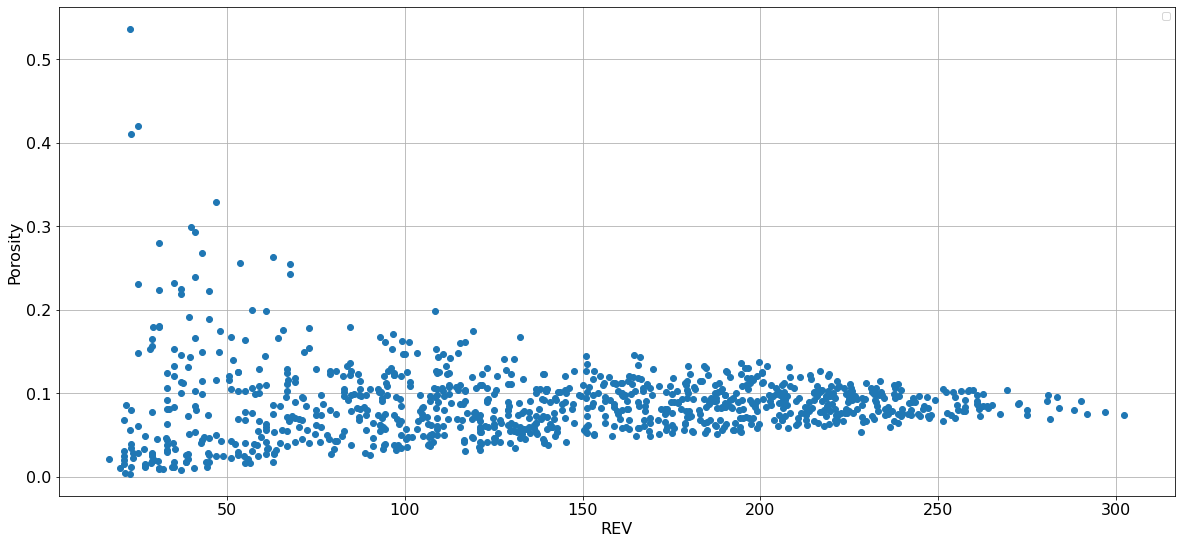

In [66]:
plt.figure(figsize=(20, 9))
plt.plot(rev.volume ** (1/3), rev.porosity ,'o', fillstyle = None) 
plt.xticks(fontsize = 16)
plt.xlabel("REV", fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Porosity", fontsize = 16)
plt.legend()
plt.grid(True)

formato da imagem HU (300, 300, 650)
formato da imagem binária (300, 300, 650)


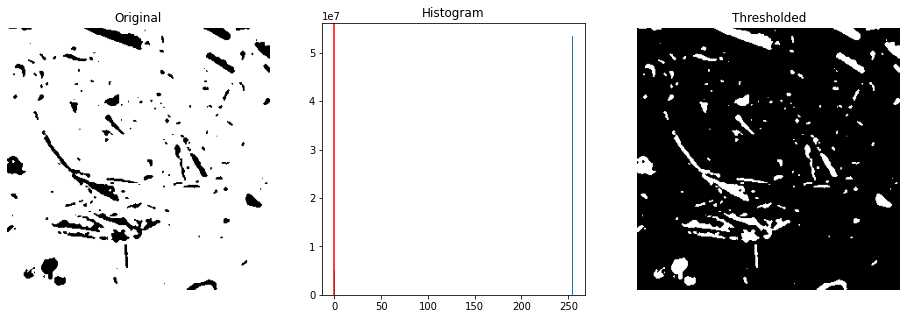

In [57]:
x_size,y_size,z_size = im_bin0.shape
x,y,z = [300,300,650]
s_x,s_y,s_z = np.array([(x_size-x)/2,(y_size-y)/2,(z_size-z)/2]).astype(int)
e_x,e_y,e_z = np.array([x_size-(x_size-x)/2,y_size-(y_size-y)/2,z_size-(z_size-z)/2]).astype(int)

im = im_leitura[s_x:e_x,s_y:e_y,s_z:e_z] # separa uma região de 400x400x400
print("formato da imagem HU", im.shape) 
im_bin = im_bin0[s_x:e_x,s_y:e_y,s_z:e_z] # separa uma região de 400x400x400
print("formato da imagem binária", im_bin.shape) 

pos = 4
fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(im[:,:, pos], cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(im_flatten.ravel(), bins=2**8)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(im_bin[:, :, pos], cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

im = im_bin

# [Métricas](https://https://porespy.readthedocs.io/en/master/modules/metrics.html?highlight=metrics#module-porespy.metrics) com o PoreSpy

Utilizado para extrair informações quantitativas, esse submódulo contém funções para determinar as **principais métricas** sobre uma imagem, normalmente aplicadas a uma imagem após a aplicação de um filtro, mas algumas funções podem ser aplicadas diretamente à **imagem binária**.

## Cálculo da porosidade

In [58]:
print(ps.metrics.porosity(im))

0.08638813675213675


## [Distribuição de poros](https:porespy.readthedocs.io/en/master/_modules/porespy/metrics/__funcs__.html#pore_size_distribution)

Calcula uma distribuição de tamanho de poro com base na imagem produzida pelas funções de [porosimetry](https://porespy.readthedocs.io/en/master/modules/filters.html#porespy.filters.porosimetry) ou [local_thickness](https://porespy.readthedocs.io/en/master/modules/filters.html#porespy.filters.local_thickness).

In [59]:
im_porosimetry = ps.filters.porosimetry(im, sizes=25, inlets=None, access_limited=True, mode='hybrid')

100%|██████████| 25/25 [02:26<00:00,  5.85s/it]


<BarContainer object of 15 artists>

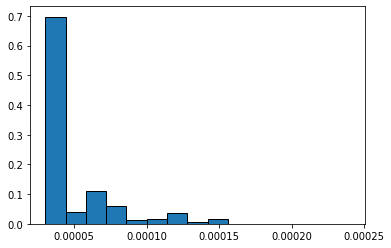

In [60]:
dist_poros = ps.metrics.pore_size_distribution(im_porosimetry, bins=15, log=False, voxel_size = 30e-6)

plt.bar(dist_poros.R, dist_poros.satn, width=dist_poros.bin_widths, edgecolor='k')

##  Impressão das amostras numpy

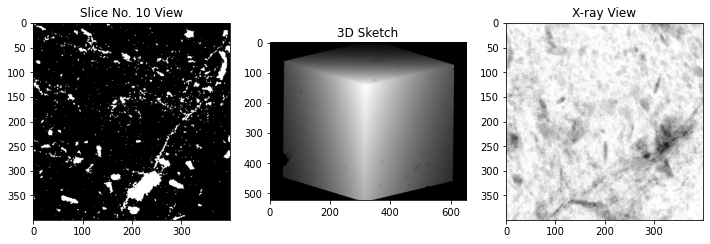

In [ ]:
#NBVAL_IGNORE_OUTPUT

fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].imshow(im[:, :, 10], cmap = 'gray');
ax[1].imshow(ps.visualization.show_3D(im), cmap = 'gray');
ax[2].imshow(ps.visualization.xray(im, direction='Z'), cmap = 'gray');
ax[0].set_title("Slice No. 10 View");
ax[1].set_title("3D Sketch");
ax[2].set_title("X-ray View");


# Criação da [Rede de Poros](https://porespy.readthedocs.io/en/master/modules/networks.html#id1)

Obtém as representações de rede a partir das seguintes funções para analisar imagens como redes de poros:

* porespy.networks.add_boundary_regions([…]) - Dada uma imagem particionada em regiões, as faces especificadas são preenchidas com novas regiões

* ***porespy.networks.snow(im[, voxel_size, …]) - Analisa uma imagem que foi particionada em regiões vazias e sólidas e extrai a geometria das fases vazias e sólidas, bem como a conectividade de rede.***

* porespy.networks.snow_dual(im[, voxel_size, …])	- Analisa uma imagem que foi particionada em regiões vazias e sólidas e extrai a geometria das fases vazias e sólidas, bem como a conectividade de rede.

* porespy.networks.regions_to_network(im[, …]) - Analisa uma imagem que foi particionada em regiões porosas e extrai a geometria dos poros e garganta, bem como a conectividade da rede.

* porespy.networks.map_to_regions(regions, values) - Mapeia valores de poros de uma rede para a imagem da qual foi extraída	

* porespy.networks.generate_voxel_image(network) - Gera imagem voxel a partir de um objeto de rede OpenPNM. 	

## Algoritmo [SNOW](https://porespy.readthedocs.io/en/master/modules/networks.html#porespy.networks.snow) (Sub-Network of the Oversegmented Watershed)

O algoritmo começa encontrando todos os picos que levariam a uma bacia hidrográfica super segmentada, reduzindo progressivamente o número de máximos locais, descartando várias classes de picos, produzindo uma sub-rede da bacia hidrográfica super-segmentada (SNOW).   

O algoritmo SNOW prossegue em quatro etapas principais:
1. Pré-filtrar o mapa de distância,
2. Eliminar os picos nas selas e planaltos,
3. Mesclar os picos muito próximos um do outro,
4. Atribuir voxels vazios ao poro apropriado usando a bacia de amarker.

Referencia: [Gostick, 2017](https://core.ac.uk/reader/151194110)




In [39]:
resolution = 50e-6 #resolução que a amostra foi escaneada
net = ps.networks.snow_n(im=im, voxel_size=resolution)

____________________________________________________________
Processing Phase phase1
------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  8595
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations reached, consider running again with a larger value of max_iters
Maximum number of iterations 

# Importa rede de poros com OpenPNM

In [40]:
file_name = 'tambaba650x300x300'

'''
O espaço de trabalho e o projeto trabalham juntos. 
O espaço de trabalho é o nível mais alto e rastreia todos os projetos abertos. 
Os projetos fornecem um nível mais baixo de supervisão. Cada projeto acompanha objetos OpenPNM específicos para cada simulação.
'''
ws = op.Workspace()
proj = op.Project()

pn = op.network.GenericNetwork(name = file_name, project=proj) # Esta classe genérica contém a principal funcionalidade usada por todas as redes
pn.update(net)  # Preenche 'pn' com dados de 'net'

In [41]:
print(pn)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
openpnm.network.GenericNetwork : tambaba650x300x300
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
#     Properties                                    Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1     pore.area                                      3100 / 3100 
2     pore.centroid                                  3100 / 3100 
3     pore.coords                                    3100 / 3100 
4     pore.diameter                                  3100 / 3100 
5     pore.equivalent_diameter                       3100 / 3100 
6     pore.extended_diameter                         3100 / 3100 
7     pore.inscribed_diameter                        3100 / 3100 
8     pore.label                                     3100 / 3100 
9     pore.surface_area                              3100 / 3100 
10    pore.volume                                   

## Remove os poros isolados da rede, verificando a integridade da rede.

Este método verifica a integridade topológica da rede, verificando:
1. Poros isolados
2. Ilhas ou aglomerados isolados de poros
3. Gargantas duplicadas
4. Gargantas bidirecionais (isto é, matriz de adjacência simétrica)
5. Gargantas sem cabeça

In [42]:
h = pn.check_network_health()
print(h)
op.topotools.trim(network=pn, pores=h['trim_pores'])
h = pn.check_network_health()
print(h)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
key                                 value
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
disconnected_clusters               [array([   5,   59,  110,  137,  139,  146,  149,  150,  152,  153,  160,
        170,  179,  181,  205,  230,  253,  254,  305,  307,  319,  321,
        345,  349,  371,  394,  412,  418,  429,  431,  432,  448,  454,
        459,  469,  473,  480,  481,  482,  489,  492,  499,  500,  507,
        513,  514,  515,  516,  532,  533,  539,  540,  552,  560,  561,
        575,  576,  582,  583,  592,  603,  612,  620,  622,  629,  630,
        633,  645,  646,  647,  656,  663,  665,  678,  679,  680,  681,
        687,  695,  696,  705,  706,  716,  717,  718,  719,  720,  727,
        728,  729,  732,  733,  734,  740,  742,  744,  745,  750,  755,
        757,  758,  760,  765,  766,  773,  776,  777,  780,  784,  785,
        786,  794,  795,  796,  7

## Adiciona ao modelo [geometria](https://openpnm.readthedocs.io/en/master/modules/models/geometry.html?highlight=op.models.geometry#module-openpnm.models.geometry) dos poros  
   Este submódulo contém modelos em escala de poros que calculam propriedades geométricas


In [43]:

# Adciona ao final das gargantas poros esfericos
mod = op.models.geometry.throat_endpoints.spherical_pores
pn.add_model(propname='throat.endpoints', model=mod)

# Calcula os comprimentos dos conduítes. Um conduíte é definido como meio poro + garganta + meio poro.
mod = op.models.geometry.throat_length.conduit_lengths
pn.add_model(propname='throat.conduit_lengths', model=mod)

# Calcula a área da superfície interna dos corpos de poros, assumindo que eles são esféricos, e subtrai a área das gargantas vizinhas.
mod = op.models.geometry.pore_surface_area.sphere
pn.add_model(propname='pore.area', model=mod)




## Nova geometria com poros e gargantas definidos

In [44]:
geo = op.geometry.GenericGeometry(network=pn, pores=pn.Ps, throats=pn.Ts)


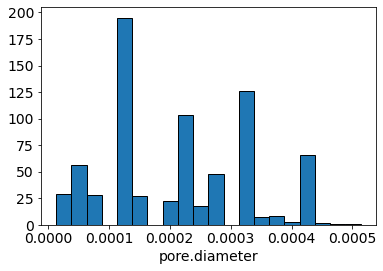

In [45]:
geo.show_hist('pore.diameter')

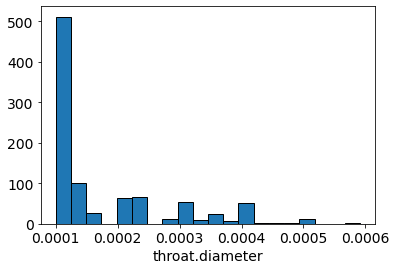

In [46]:
geo.show_hist('throat.diameter')

## Plotagem 3D da rede

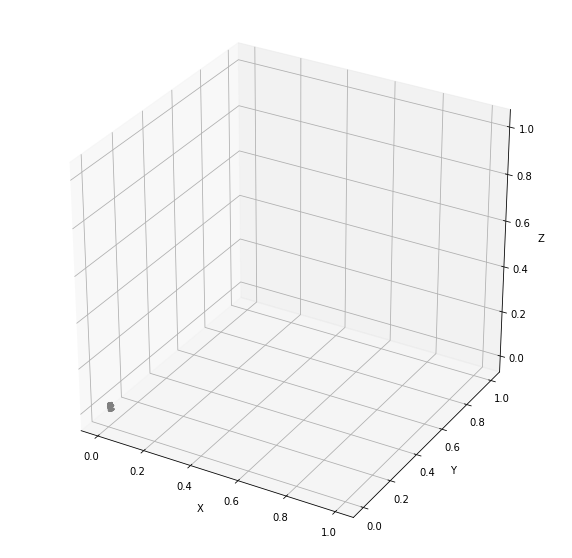

In [47]:
#NBVAL_IGNORE_OUTPUT
fig = op.topotools.plot_connections(network=geo, c='black')
fig.set_size_inches([10, 10])
fig = op.topotools.plot_coordinates(network=geo, c='gray', fig=fig)

## Atributos [físicos](https://openpnm.readthedocs.io/en/master/modules/physics/index.html) e de [fase](https://openpnm.readthedocs.io/en/master/modules/phases/index.html) do modelo

O OpenPNM inclui algumas subclasses de Fase que contêm um conjunto de modelos pré-configurados que prevêem as propriedades termofísicas de certas fases comuns.

1. Água - A maioria dos modelos inclui o impacto da salinidade
2. Ar - Uma mistura de O2 e N2, mas sem umidade
3. Mercúrio -  Útil para simulações de porosimetria, assumindo que teta é 140


In [48]:
mercurio = op.phases.Mercury(network=pn) # cria fase de mercurio (geralmente usado em experimentos de porosimetria)

In [49]:
phys_mercurio = op.physics.Standard(network=pn, phase=mercurio, geometry=geo) #atribui a física do modelo

mod = op.models.physics.hydraulic_conductance.hagen_poiseuille
phys_mercurio.add_model(propname='throat.hydraulic_conductance', model=mod)

# Modelo de estimativa da permeabilide 

In [50]:
# Algoritmo de simulação
perm = op.algorithms.StokesFlow(network=pn, project=proj)
perm.setup(phase=mercurio)

# Condições de contorno
pTop = 10
pBottom = 0

perm.set_value_BC(pores=pn.pores('top'), values=pTop) # pressão no top
perm.set_value_BC(pores=pn.pores('bottom'), values=pBottom) # pressão na base

perm.set_rate_BC(pores=pn.pores('left'), values=pBottom) # pressão na esquerda
perm.set_rate_BC(pores=pn.pores('right'), values=pBottom) # pressão na direita

perm.set_rate_BC(pores=pn.pores('front'), values=pBottom) # pressão no frente
perm.set_rate_BC(pores=pn.pores('back'), values=pBottom) # pressão na atrás

perm.run()
mercurio.update(perm.results())

ModuleNotFoundError: ignored

In [ ]:
# CÁLCULO DA PERMEABILIDADE POR DARCY

Q = perm.rate(pores=pn.pores('bottom'), mode='group')

A = (im.shape[0] * im.shape[1]) * resolution**2
L = im.shape[2] * resolution
mu = mercurio['pore.viscosity'].max()

delta_P = pBottom - pTop
K = Q * L * mu / (A * delta_P)
print('The value of K is:', K/0.98e-12*1000, 'mD')
#print('The value of Ks is:', K*9.813*1000/(1.004*10**-6), 'mm/s')

Exportação para a leitura no [ParaView](https://kitware.github.io/paraview-glance/app/) 

In [ ]:
proj.export_data(phases=[mercurio], filename ='drive/My Drive/PDI/'+ file_name, filetype='vtk') 

In [ ]:
op.io.VTK.save(network=geo, phases=mercurio,filename='test_file2')